# K-NN (K-Nearest Neighbors), RandomForest, ADABOOST

All are supervised learning algorithms

![ML](images/ml39.png)

# 1st GOAL IS TO SELF-RESEARCH, UNDERSTAND WHAT THESE ALGORITHMS ARE, FURTHER IMPLEMENT THE SAME

## Data Preparation & Visualization Helper Classes (common for all)

In [1]:
#!/usr/bin/python
import random


def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test

In [2]:
#!/usr/bin/python

import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.savefig("test.png")

import base64
import json
import subprocess

def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print image_start+json.dumps(data)+image_end
                                    


# K-NN (K-Nearest Neighbor)

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

Simple method, looks at K nearest neigbors, K is nothing but any positive number. The classes with most frequency in this K set would be assumed by classifer as predicted outcome.

Strenghts-
1. Simplest
2. Can be effective in less complex data, where classes are least overlap

Weaknesses-
1. May not perform well with Higher Dimensionality Data as all vectors may be equidistant
2. May require dimensionality reduction and techniques like principal component analysis (PCA), linear discriminant analysis (LDA), or canonical correlation analysis (CCA) as a pre-processing step 

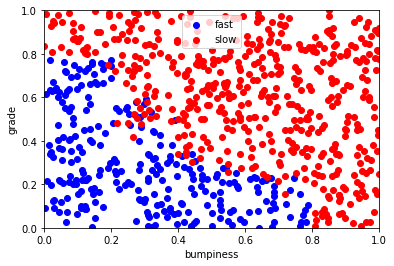

In [3]:
#!/usr/bin/python

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
#from prep_terrain_data import makeTerrainData
#from class_vis import prettyPicture
# sklearn accuracy_score function
from sklearn.metrics import accuracy_score
from IPython.display import Image

features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################

Training Time: 0.002 s
Prediction Time: 0.001 s
Accuracy Score :  0.92


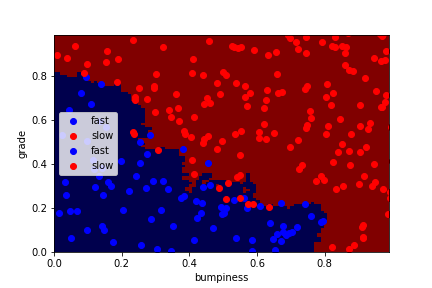

In [9]:
import sys
from time import time
### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary

## Classifier Instantiation
clf = KNeighborsClassifier(n_neighbors=5)
## Training
clf.fit(features_train,labels_train)

## Time track to train
t0 = time()

##Prediction
pred = clf.predict(features_test)

print "Training Time:", round(time()-t0, 3), "s"

## Time track to train
t0 = time()

##Accuracy Score
acc_score = accuracy_score(pred, labels_test)

print "Prediction Time:", round(time()-t0, 3), "s"

print "Accuracy Score : ", acc_score

##Visual Representation
prettyPicture(clf, features_test, labels_test)
Image("test.png")

# Random Forest

https://en.wikipedia.org/wiki/Random_forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

Strenghts-


Weaknesses-


Training Time: 0.006 s
Prediction Time: 0.001 s
Accuracy Score :  0.92


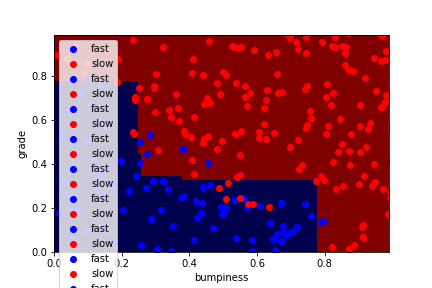

In [22]:
#!/usr/bin/python

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
#from prep_terrain_data import makeTerrainData
#from class_vis import prettyPicture
# sklearn accuracy_score function
from sklearn.metrics import accuracy_score
from IPython.display import Image

features_train, labels_train, features_test, labels_test = makeTerrainData()
### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary

## Classifier Instantiation
clf = RandomForestClassifier(max_depth=2, random_state=0, min_samples_split=50)
## Training
clf.fit(features_train,labels_train)

## Time track to train
t0 = time()

##Prediction
pred = clf.predict(features_test)

print "Training Time:", round(time()-t0, 3), "s"

## Time track to train
t0 = time()

##Accuracy Score
acc_score = accuracy_score(pred, labels_test)

print "Prediction Time:", round(time()-t0, 3), "s"

print "Accuracy Score : ", acc_score

##Visual Representation
prettyPicture(clf, features_test, labels_test)
Image("test.png")

# AdaBoost (Adaptive Boosting)

https://en.wikipedia.org/wiki/AdaBoost

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

Strenghts-


Weaknesses-


Training Time: 0.009 s
Prediction Time: 0.001 s
Accuracy Score :  0.924


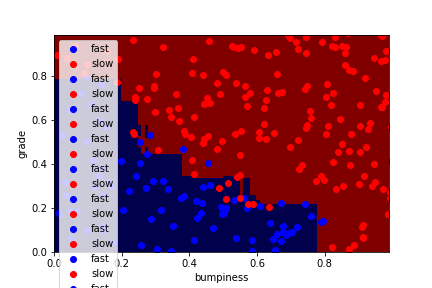

In [25]:
#!/usr/bin/python

import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
#from prep_terrain_data import makeTerrainData
#from class_vis import prettyPicture
# sklearn accuracy_score function
from sklearn.metrics import accuracy_score
from IPython.display import Image

features_train, labels_train, features_test, labels_test = makeTerrainData()
### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary

## Classifier Instantiation
clf = AdaBoostClassifier(n_estimators=100)
## Training
clf.fit(features_train,labels_train)

## Time track to train
t0 = time()

##Prediction
pred = clf.predict(features_test)

print "Training Time:", round(time()-t0, 3), "s"

## Time track to train
t0 = time()

##Accuracy Score
acc_score = accuracy_score(pred, labels_test)

print "Prediction Time:", round(time()-t0, 3), "s"

print "Accuracy Score : ", acc_score

##Visual Representation
prettyPicture(clf, features_test, labels_test)
Image("test.png")

# Fun challenge to see if we can beat Udacity's best score of 93.6% accuracy rate.

Based on observation, I noticed on earluer runs we got pretty good score with SVM .. So I cam going to bring that here for fun ...

In [30]:
import sys
from time import time

from sklearn.svm import SVC
# sklearn accuracy_score function
from sklearn.metrics import accuracy_score

### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, labels_train, features_test, labels_test = makeTerrainData()

#########################################################
### your code goes here ###
#########################################################

# Instantiate SVC Classifier with RBF Kernel
# Accuracy 99% on all training data (training/prediction times as 2 minutes / 10 sec)
# Accuracy 89% on just 1% of training data (training/prediction times as sub-secs)
clf = SVC(kernel="rbf", C=100000.)

## Time track to train
t0 = time()

# Train the Classifier
clf.fit(features_train, labels_train)

print "Training Time:", round(time()-t0, 3), "s"

## Time track to predict
t0 = time()

# Prediction on test data
#pred = clf.predict(features_test[50].reshape(1,-1))
pred = clf.predict(features_test)

#print ("Prediction :", pred)

print "Prediction Time:", round(time()-t0, 3), "s"

# Overall Accuracy
accuracy_score = accuracy_score(pred, labels_test)

print ("Accuracy Score: ", accuracy_score)

Training Time: 0.096 s
Prediction Time: 0.001 s
('Accuracy Score: ', 0.94399999999999995)
